# Matplotlib Notebook

In [1]:
#importing various libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

[0 1 2 3 4 5 6 7 8 9]


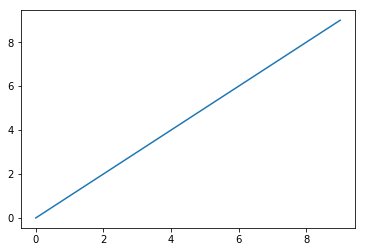

In [2]:
#ploting a simple line graph with pandas
data = np.arange(10)
print(data)
plt.plot(data)

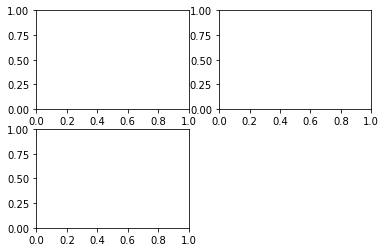

In [3]:
#empty figures
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

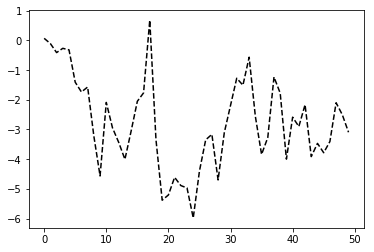

In [4]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

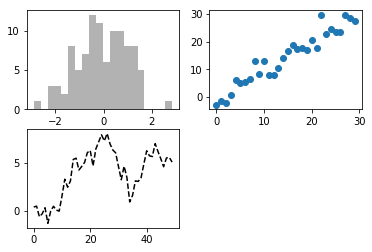

In [5]:
#plotting graphs on the subplots
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')

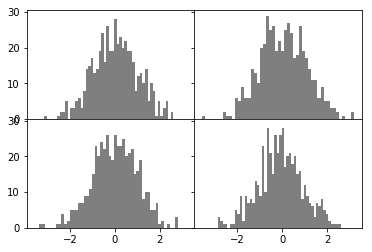

In [6]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

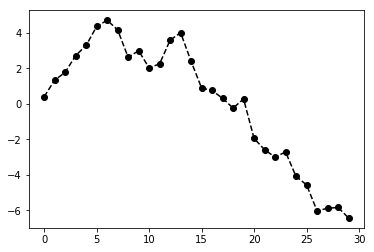

In [7]:
#line plot with black colour, dashed marker,and 'o' point
plt.plot(np.random.randn(30).cumsum(), 'ko--')

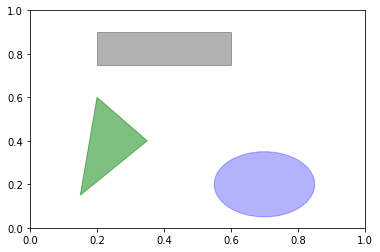

In [8]:
#ploting shapes
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Ploting with Pandas and Seaborn

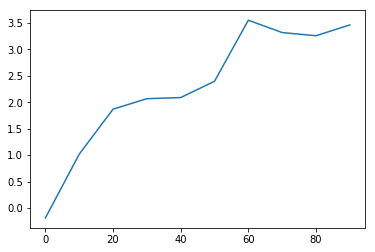

In [9]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

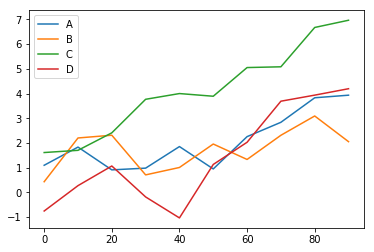

In [10]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),columns=['A', 'B', 'C', 'D'],index=np.arange(0, 100, 10))
df.plot()

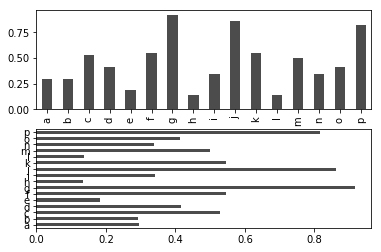

In [11]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [12]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.487631,0.726073,0.596666,0.735060
two,0.938555,0.555497,0.923306,0.578986
three,0.269896,0.192977,0.649689,0.873590
four,0.174875,0.065423,0.800880,0.050853
five,0.100509,0.597632,0.987555,0.626001
six,0.241064,0.648296,0.834165,0.544452


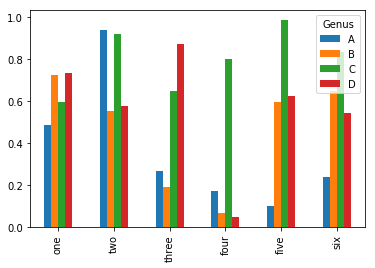

In [13]:
df.plot.bar()

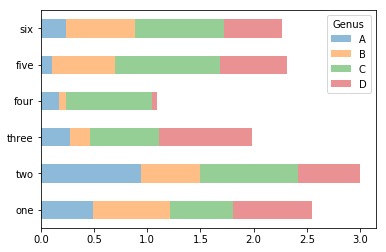

In [14]:
df.plot.barh(stacked=True, alpha=0.5)

In [17]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [18]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


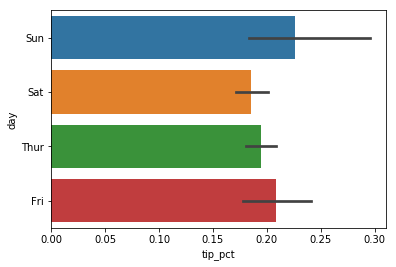

In [19]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

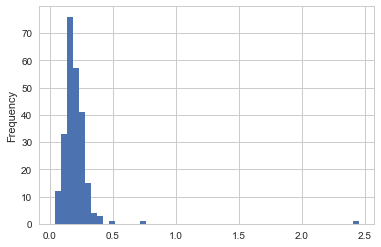

In [21]:
sns.set(style="whitegrid")
tips['tip_pct'].plot.hist(bins=50)

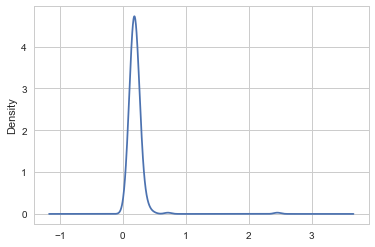

In [22]:
tips['tip_pct'].plot.density()

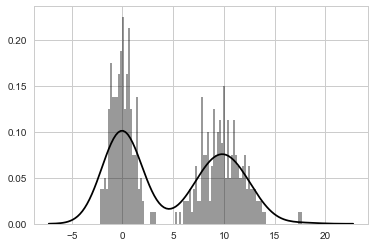

In [23]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

In [24]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 versus log unemp')

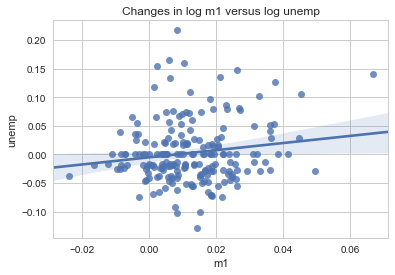

In [25]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

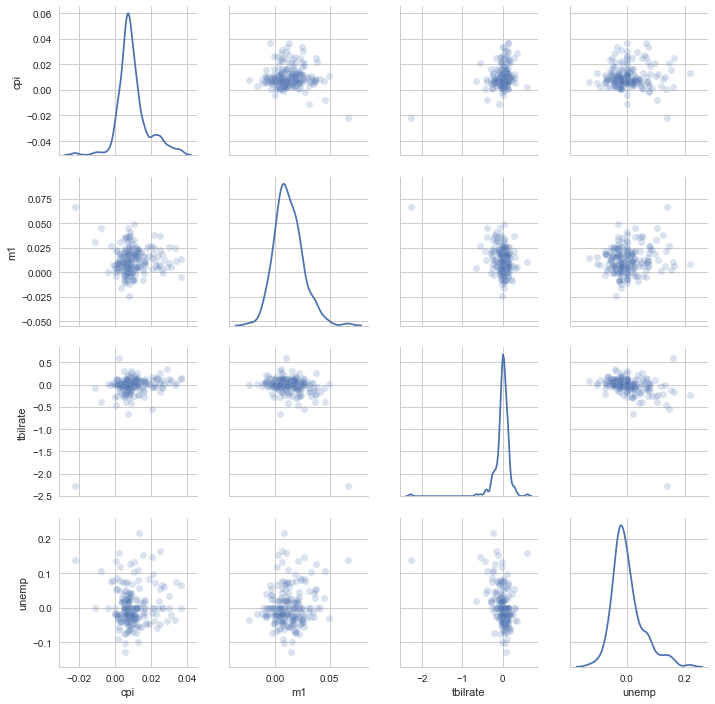

In [26]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

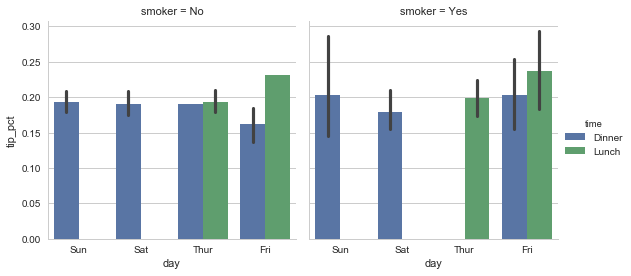

In [27]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',kind='bar', data=tips[tips.tip_pct < 1])

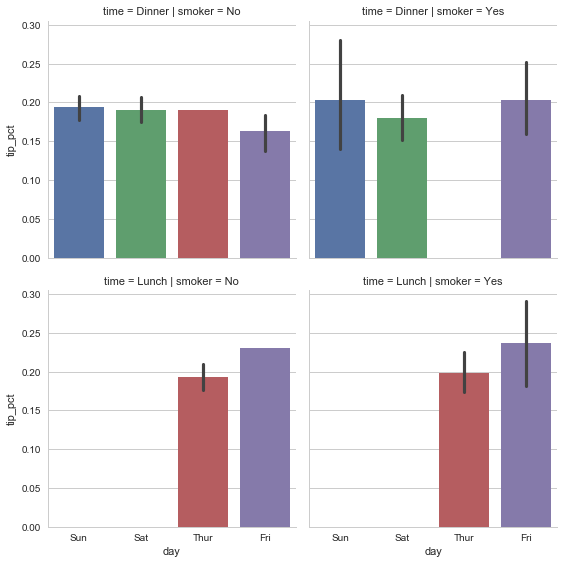

In [28]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker',kind='bar', data=tips[tips.tip_pct < 1])

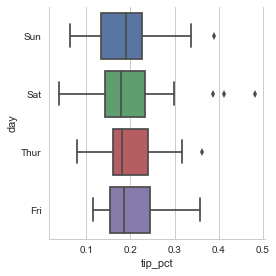

In [29]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])